## Dependencies

In [137]:
import matplotlib.pyplot as plt
import networkx as nx # for graph creation
import time # for timing
from itertools import permutations # for generating all possible permutations


## Graph Creation

In [144]:
class Graph():
    def __init__(self, vertices):
        # Initialize the graph as an adjacency matrix with all with 0's
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]
        self.V = vertices  # Set the number of vertices

    def add_edge(self, u, v):
        # Add an undirected edge between u and v
        self.graph[u][v] = 1
        self.graph[v][u] = 1

    def add_edges_from_graph(self, graph):
        for edge in graph.edges():
            self.add_edge(edge[0], edge[1])

    def summary(self):
        # print nodes and edges
        print("Nodes: ", self.V)
        print("Edges: ", sum([sum(row) for row in self.graph])//2)

    def plot_graph(self):
        G = nx.Graph()
        for i in range(self.V):
            G.add_node(i)
        for i in range(self.V):
            for j in range(i, self.V):
                if self.graph[i][j] == 1:
                    G.add_edge(i, j)
        nx.draw(G, with_labels=True)
        plt.show()

In [145]:
# make graph
n = 10
cycle_graph = nx.complete_graph(n)
cycle_graph_instance = Graph(n)
cycle_graph_instance.add_edges_from_graph(cycle_graph)
cycle_graph_instance.summary()

Nodes:  10
Edges:  45


## Brute Force

In [172]:
def is_valid_cycle(perm, adj):
    # Check if the permutation forms a valid cycle in the graph
    N = len(perm)
    # Check if all consecutive vertices are connected
    for i in range(N - 1):
        if adj[perm[i]][perm[i + 1]] == 0:
            return False
    # Check if the last vertex is connected to the first vertex to complete the cycle
    if adj[perm[N-1]][perm[0]] == 0:
        return False
    return True

def hamiltonian_cycle_bruteforce(graph):
    # Find a Hamiltonian cycle in the graph using brute force
    adj = graph.graph if isinstance(graph, Graph) else graph  # Assuming Graph class has a 'graph' attribute
    N = len(adj)  # Number of vertices
    all_perms = permutations(range(N))
    
    for perm in all_perms:
        if is_valid_cycle(perm, adj):
            complete_cycle = perm + (perm[0],)
            print_bf(complete_cycle)
            # plot_bf(graph, complete_cycle)
            return True  # Return True and the complete cycle
    # plot_bf(graph)
    print("Solution does not exist\n")
    return False  # Return False if no valid cycle is found

def print_bf(path):
    print("Solution BF Exists: Following is one Hamiltonian Cycle")
    for vertex in path[:-1]:
        print(vertex, end=" -> ")
    print(path[-1])

# def plot_bf(graph, path=None):
#     G = nx.Graph()
#     for i in range(len(graph)):
#         for j in range(i, len(graph)):
#             if graph[i][j] == 1:
#                 G.add_edge(i, j)
#     pos = nx.spring_layout(G)
#     plt.figure(figsize=(5, 2))
#     nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='yellow', edge_color='gray')
#     if path:
#         edges_in_path = [(path[i], path[(i + 1) % len(graph)]) for i in range(len(graph))]
#         nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)
#     plt.show()

Solution Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> 0


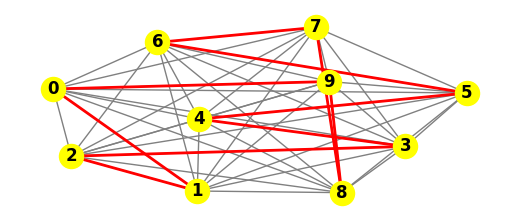

True

In [150]:
hamiltonian_cycle_bruteforce(cycle_graph_instance.graph)

## Back Tracking

In [173]:
def isSafe(graph, v, pos, path):
    # Check if current vertex and last vertex in path are adjacent
    if graph[path[pos-1]][v] == 0:
        return False
    # Check if current vertex not already in path
    for vertex in path:
        if vertex == v:
            return False
    return True

def hamCycleUtil(graph, path, pos):
    V = len(graph)
    # Base case: if all vertices are included in the path
    if pos == V:
        # Last vertex must be adjacent to the first vertex in path to make a cycle
        if graph[path[pos-1]][path[0]] == 1:
            return True
        else:
            return False
    # Explore all vertices other than the first vertex
    for v in range(1, V):
        if isSafe(graph, v, pos, path):
            path[pos] = v
            if hamCycleUtil(graph, path, pos+1):
                return True
            # DeadEnd - Remove current vertex if it doesn't lead to a solution
            path[pos] = -1
    return False

def hamCycle(graph):
    V = len(graph)
    # Initialize path as -1
    path = [-1] * V
    # Start from vertex 0 as the first vertex in the path
    path[0] = 0
    # Call the recursive helper function to find Hamiltonian cycle
    if not hamCycleUtil(graph, path, 1):
        print("Solution does not exist\n")
        # plot_bt(graph)
        return False
    print_bt(path)
    # plot_bt(graph, path)
    return True

def print_bt(path):
    print("Solution BT Exists: Following is one Hamiltonian Cycle")
    for vertex in path:
        print(vertex, end=' -> ')
    print(path[0])  # Print the first vertex again to show the complete cycle

# def plot_bt(graph, path=None):

#     G = nx.Graph()
#     for i in range(len(graph)):
#         for j in range(i, len(graph)):
#             if graph[i][j] == 1:
#                 G.add_edge(i, j)
#     pos = nx.spring_layout(G)
#     plt.figure(figsize=(5, 2))
#     nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='yellow', edge_color='gray')
#     if path:
#         edges_in_path = [(path[i], path[(i + 1) % len(graph)]) for i in range(len(graph))]
#         nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)
#     plt.show()


In [ ]:
hamCycle(cycle_graph_instance.graph)

## Dynamic Programming

In [174]:
def Hamiltonian_cycle_dp(graph):
    """
    Check for a Hamiltonian cycle in a graph using dynamic programming.
    """
    adj = graph.graph if isinstance(graph, Graph) else graph  # Assuming Graph class has a 'graph' attribute
    N = len(adj)  # Number of vertices

    dp = [[False for _ in range(1 << N)] for _ in range(N)]
    parent = [[-1 for _ in range(1 << N)] for _ in range(N)]

    # Set dp[i][1 << i] to true for each node i
    for i in range(N):
        dp[i][1 << i] = True

    # Iterate over each subset of nodes
    for mask in range(1 << N):
        for j in range(N):
            if mask & (1 << j):
                for k in range(N):
                    if mask & (1 << k) and adj[k][j] == 1 and j != k and dp[k][mask ^ (1 << j)]:
                        dp[j][mask] = True
                        parent[j][mask] = k
                        break

    # Check for any node 'i' that can end a Hamiltonian cycle
    for i in range(N):
        if dp[i][(1 << N) - 1] and adj[i][0] == 1:
            # Recover the path
            path = []
            cur = i
            mask = (1 << N) - 1

            while cur != -1:
                path.append(cur)
                temp = cur
                cur = parent[cur][mask]
                mask = mask ^ (1 << temp)

            path.reverse()

            # Check if path forms a cycle
            if len(path) == N and adj[path[-1]][path[0]] == 1:
                path.append(path[0])
                print_dp(path)
                # plot_dp(graph, path)
                return True
    # plot_dp(graph)
    print("No Hamiltonian Cycle exists")
    return False

def print_dp(path):
    print("Solution DP Exists: Following is one Hamiltonian Cycle")
    for vertex in path[:-1]:
        print(vertex, end=' -> ')
    print(path[-1])
    
# def plot_dp(graph, path=None):
#     G = nx.Graph()
#     for i in range(len(graph)):
#         for j in range(i, len(graph)):
#             if graph[i][j] == 1:
#                 G.add_edge(i, j)
#     pos = nx.spring_layout(G)
#     plt.figure(figsize=(5, 2))
#     nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='yellow', edge_color='gray')
#     if path:
#         edges_in_path = [(path[i], path[(i + 1) % len(graph)]) for i in range(len(graph))]
#         nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color='red', width=2)
#     plt.show()


Solution Exists: Following is one Hamiltonian Cycle
9 -> 8 -> 7 -> 6 -> 5 -> 4 -> 3 -> 2 -> 0 -> 1 -> 9


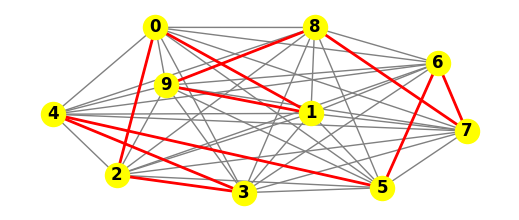

True

In [156]:
Hamiltonian_cycle_dp(cycle_graph_instance.graph)

## Complexity Comparison

In [177]:
# Function to measure execution time of algorithms
def measure_runtime(func, graph):
    start_time = time.time()
    func(graph)
    end_time = time.time()
    return end_time - start_time

# Variables to store runtimes and number of vertices
vertices = []
bf_runtimes = []
bt_runtimes = []
dp_runtimes = []

# Loop to generate complete graphs with increasing vertices and measure runtimes
for n in range(2, 50):  # Change range as needed
    cycle_graph = nx.complete_graph(n)
    cycle_graph_instance = Graph(n)
    cycle_graph_instance.add_edges_from_graph(cycle_graph)

    bf_runtime = measure_runtime(hamiltonian_cycle_bruteforce, cycle_graph_instance.graph)
    bt_runtime = measure_runtime(hamCycle, cycle_graph_instance.graph)
    dp_runtime = measure_runtime(Hamiltonian_cycle_dp, cycle_graph_instance.graph)

    vertices.append(n)
    bf_runtimes.append(bf_runtime)
    bt_runtimes.append(bt_runtime)
    dp_runtimes.append(dp_runtime)

# Plotting the runtimes against the number of vertices
plt.figure(figsize=(10, 6))
plt.plot(vertices, bf_runtimes, label='Brute Force')
plt.plot(vertices, bt_runtimes, label='Backtracking')
plt.plot(vertices, dp_runtimes, label='Dynamic Programming')
plt.xlabel('Number of Vertices')
plt.ylabel('Time Taken (seconds)')
plt.title('Runtime Comparison for Hamiltonian Cycle Algorithms')
plt.legend()
plt.grid(True)
plt.show()


Solution BF Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 0
Solution BT Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 0
Solution DP Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 0
Solution BF Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 0
Solution BT Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 0
Solution DP Exists: Following is one Hamiltonian Cycle
2 -> 0 -> 1 -> 2
Solution BF Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 0
Solution BT Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 0
Solution DP Exists: Following is one Hamiltonian Cycle
3 -> 2 -> 0 -> 1 -> 3
Solution BF Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 4 -> 0
Solution BT Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 4 -> 0
Solution DP Exists: Following is one Hamiltonian Cycle
4 -> 3 -> 2 -> 0 -> 1 -> 4
Solution BF Exists: Following is one Hamiltonian Cycle
0 -> 1 -> 2 -> 3 -> 4 -> 5 -> 0
Solution BT Exists: